In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time as t

In [3]:
atom_list = [['A', 1, 0, 0, 0],
             ['B', 2, 0, 0, 1],
             ['C', 3, 0, 1, 1],
             ['D', 4, 1, 1 ,1],
             ['E', 5, 0, 0, 2]]

positions = np.array(atom_list)[:, 2:5]
positions = np.float64(positions)

labels = np.array(atom_list)[:, :2]


In [4]:
### Distance functions

# Nested loop
def ed_nested(positions):
    distances = []    
    for positionA in positions:
            a = np.array(positionA)
            for positionB in positions:
                b = np.array(positionB)
                distance = np.linalg.norm(a-b)
                distances.append(distance)
    return distances

# Matrix mult
def ed_matrix(positions):
    distances  = []
    for position in positions:
        net = position - positions
        s = np.dot(net, net.T)
        distance = np.diagonal(np.sqrt(np.sqrt(s**2)))
        distances.append(distance)
    
    return distances

In [5]:
# timing
def time_funcs(max_atoms, step):
    times_nested = []
    times_matrix = []
    
    iterations = range(1, max_atoms + step, step)
    
    for i in iterations:
        positions = np.random.rand(i,3)
        
        start_nested = t.time()
        d = ed_nested(positions)
        total_nested = t.time() - start_nested
        times_nested.append(total_nested)
        
        
        start_matrix = t.time()
        d = ed_matrix(positions)
        total_matrix = t.time() - start_matrix
        times_matrix.append(total_matrix)
    
    atom_number = list(iterations)
    
    return atom_number, times_nested, times_matrix    

In [6]:
atom_number, times_nested, times_matrix = time_funcs(1000, 200)

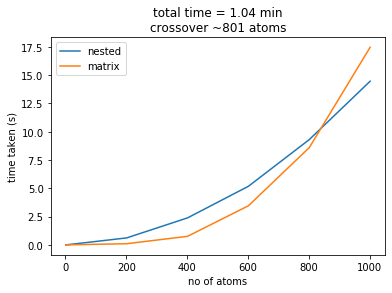

In [8]:
total_time = round((sum(times_nested) + sum(times_matrix))/60, 2)

unit_cell_no = np.array(atom_number) / 5
supercell_size = unit_cell_no ** (1/3)

#comparing both data
abs_diff = abs(np.log(times_nested) - np.log(times_matrix)).tolist()
cross_over = atom_number[abs_diff.index(min(abs_diff))]


plt.plot(atom_number, times_nested, label = 'nested')
plt.plot(atom_number, times_matrix, label = 'matrix')
plt.xlabel('no of atoms')
plt.ylabel('time taken (s)')
#plt.yscale('log')
plt.legend()
plt.title(f'''total time = {total_time} min
crossover ~{cross_over} atoms''')
plt.show()